# ML Assignment 1

## Question 1: Census Income Prediction

This is a Jupyter Notebook created for the analysis on the given dataset for the question 1 in ML assignment #1. The assignment is done collaborately by the group of 4 members. The details are as follows,

Group ID : `ML_GROUP006`

Group Members: 
    1. Bala Kavin Pon : 2018AC04531
    2. Ponvani : 2018AC04559 
    3. Venkataramanan Krishnan : 2018AC04529
    4. Poornima J : 2018AC04550

### Problem Statement

Considering the Census Income data with response variable as Income(>50k and <=50k).

* Import the csv dataset from [Data Source](https://www.kaggle.com/uciml/adult-census-income)  (1 points).
* Identify the presence of missing values, fill the missing values with mean for numerical attributes and mode value for categorical attributes. (2 points)
* Visualize the dataset. (1 points)
* Extract X as all columns except the Income column and Y as Income column. (1 points)
* Split the data into training set and testing set. (1 points)
* Model the classifier using GaussianNB and MultinomialNB. (2 points)
* Compute the accuracy and confusion matrix for each model. (4 points)
* Plot the decision boundary, visualize training and test results (1 point)

The following steps are performed in a sequencial order to load, explore the data, build the model and evaluation. 

<a id="top"></a>
**Sequential Steps:**
0. [Import Libraries](#import)
1. [Loading data](#loaddata)
2. [Exploratory Data Analysis](#eda)
3. [Feature Engineering](#datapreparation)
4. [Building Model](#modelbuilding)
5. [Evaluation of Model](#evaluation)
6. [Decision Boundary](#decisionboundary)

<a id="import"></a>
## Step 0: Importing Required Libraries

In [58]:
#!pip install pandas-profiling sklearn

In [59]:
import pandas as pd
import numpy as np

import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

plt.style.use('ggplot')

# Required libraries for classification and decision boundary
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

<a id="loaddata"></a>

## Step 1: Loading Data 
Move [top](#top)

In [60]:
data = pd.read_csv(na_values='?',filepath_or_buffer='./adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [142]:
#data.profile_report(style={'full_width':True},correlations={'phi_k':True,'cramers':False,'pearson':False,'spearman':False,'kendall':False,'recoded':False})

## Observations
- Dataset has 24 duplicate rows, - which has to be removed

- `native.country` (Categorical) has 583 (1.8%) missing values 
    - *This will be replaced with ode value, as mentioned in the Assignment statement*

- `occupation` (Categorical) has 1843 (5.7%) missing values
    - *This will be replaced with mode value, as mentioned in the Assignment statement*
    - *Top 3 values frequencies are 12.7%, 12.6% and 12.5% , which are so close, so replacing 5.7% (1843) missing values with Mode value should be double checked. Still we will stick to the assignment statement*

- `workclass` has 1836 (5.6%) missing values
    - *This will be replaced with mode value, as mentioned in the Assignment statement*
    



<a id="eda"></a>
## Step 2: Exploratory Data Analysis

Move [top](#top)

#### Removing Duplicates

In [63]:
#code to remove dupicates from data
data = data.drop_duplicates()

#### Replacing Missing Values (with Mode)
- `native.country`
- `occupation`
- `workclass`

In [64]:
data['native.country'] = data['native.country'].fillna(data['native.country'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])

For doing Bivariate analysis followed below link
https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

### 1.Age 
- Let it be continious varibale for now, we can change it to bins later

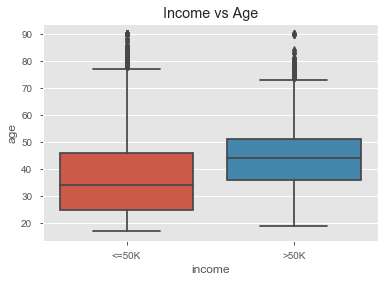

In [65]:
sns.boxplot(x='income',y='age', data=data)
plt.title('Income vs Age') 
plt.show()

https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas

Text(0.5, 1, 'Income vs Age')

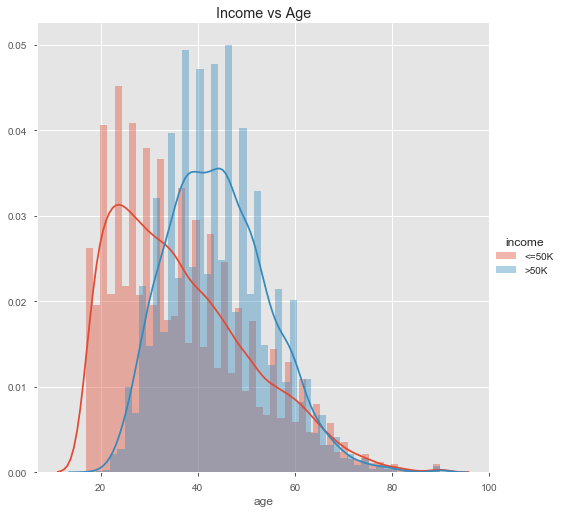

In [66]:
sns.FacetGrid(data,hue='income',size=7).map(sns.distplot,'age').add_legend()
plt.title('Income vs Age') 

Text(0.5, 1.0, 'Income vs Workclass')

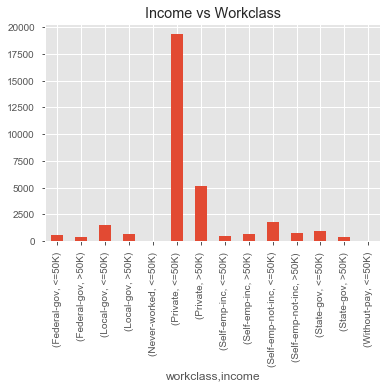

In [67]:
data.groupby(['workclass', 'income']).count()['age'].plot.bar(stacked=True)
plt.title('Income vs Workclass') 

### 2. Workclass 
- `Without-pay` , `Never-worked` did not even present in 1% of data set hence marking it as others - this class 100% falls under <=50K category of income
- One-Hot encoding

In [68]:
data['workclass'] = data['workclass'].replace(['Without-pay','Never-worked' ] , ['others','others'])

#doing onehot encoding 
column_name='workclass'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 3.Fnlwgt
- Normalizing it 

income
<=50K    AxesSubplot(0.125,0.125;0.775x0.755)
>50K     AxesSubplot(0.125,0.125;0.775x0.755)
Name: fnlwgt, dtype: object

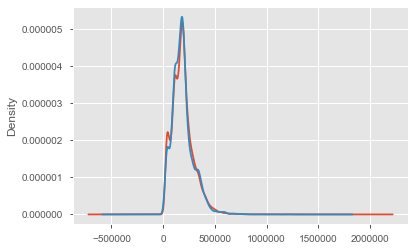

In [69]:
data.groupby('income').fnlwgt.plot(kind='kde')

With info from abouve graph and from Profiling report 
- we will normalize this column data from -1 to 1

In [70]:
#mean_val=data["fnlwgt"].mean()
#std_val=data["fnlwgt"].std()

min_val=data["fnlwgt"].min()
max_val=data["fnlwgt"].max()

data["fnlwgt"]=((data["fnlwgt"]-min_val)/(max_val-min_val))
#data["fnlwgt"]=((data["fnlwgt"]-mean_val)/std_val)

#### 4. Education


Text(0.5, 1.0, 'Income vs Education')

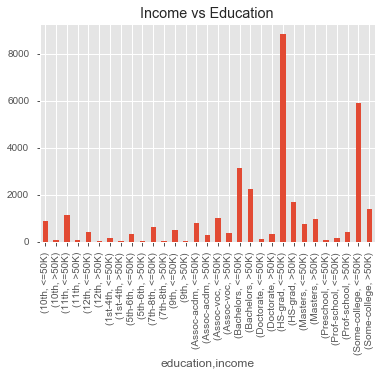

In [71]:
data.groupby(['education', 'income']).count()['age'].plot.bar(stacked=True)
plt.title('Income vs Education') 

In [72]:
data['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [73]:
data['education'] = data['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','Assoc-acdm','Assoc-voc' ] 
                , ['below_high_school','below_high_school','below_high_school','below_high_school','below_high_school','below_high_school','above_high_school','above_high_school','Assoc','Assoc'])

#doing onehot encoding 
column_name='education'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 5. Education.num
- droping it as its covered in education column. Verified with `Phik` Correlations graph in profiling 

In [74]:
data.drop('education.num', axis=1, inplace=True)

### 6.marital.status

Text(0.5, 1.0, 'Income vs Marital Status')

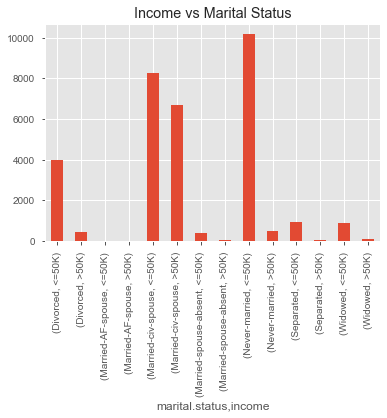

In [75]:
data.groupby(['marital.status', 'income']).count()['age'].plot.bar(stacked=True)
plt.title('Income vs Marital Status') 

In [76]:
data['marital.status'] = data['marital.status'].replace(['Married-spouse-absent','Married-AF-spouse' ] , ['Married-xx','Married-xx'])

#doing onehot encoding 
column_name='marital.status'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 7.occupation

Text(0.5, 1.0, 'Income vs Occupation')

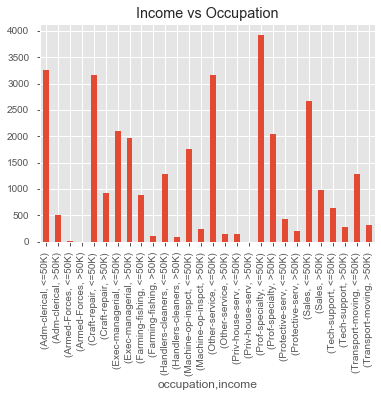

In [77]:
data.groupby(['occupation', 'income']).count()['age'].plot.bar(stacked=True)
plt.title('Income vs Occupation') 

In [78]:
data.occupation.value_counts()

Prof-specialty       5979
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [79]:
data['occupation'] = data['occupation'].replace(['Armed-Forces','Priv-house-serv','Protective-serv' ] , ['Other-service','Other-service','Other-service'])

#doing onehot encoding
column_name='occupation'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 8. relationship

Text(0.5, 1.0, 'Income vs Relationship')

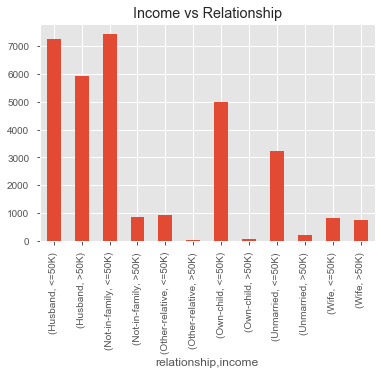

In [80]:
data.groupby(['relationship', 'income']).count()['age'].plot.bar(stacked=True)
plt.title('Income vs Relationship') 

In [81]:

#doing onehot encoding
column_name='relationship'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 9. race

Text(0.5, 1.0, 'Income vs Race')

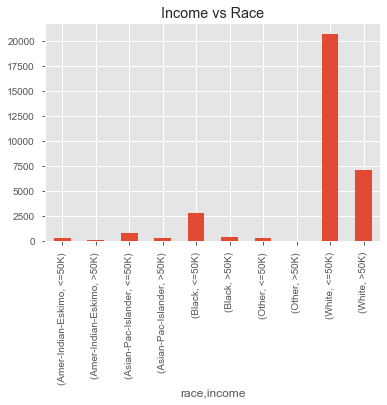

In [82]:
data.groupby(['race', 'income']).count()['age'].plot.bar(stacked=True)
plt.title('Income vs Race') 

In [83]:

#doing onehot encoding
column_name='race'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 10. sex

In [84]:
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})

### 11. capital.gain

Seems data is too much skewed, from the stats shown in profiling 
<br>
Hence converting it in to categorical Zero, Low, Medium, High, UltraHigh

Text(0.5, 1, 'Income vs Capital Gain')

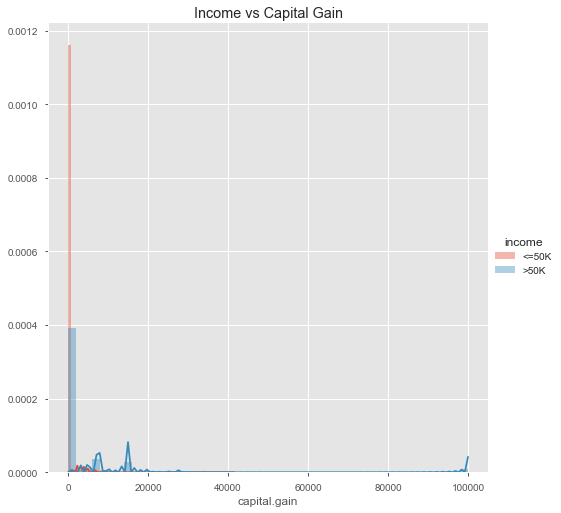

In [85]:
sns.FacetGrid(data,hue='income',size=7).map(sns.distplot,'capital.gain').add_legend()
plt.title('Income vs Capital Gain') 

In [86]:
bins = [-1,0, 5000, 10000, 20000, 150000]
labels =['Zero','Low','Medium','High','UltraHigh']    # 
data['capital.gain']=pd.cut(data['capital.gain'], bins,labels=labels)

Text(0.5, 1.0, 'Income vs Capital Gain')

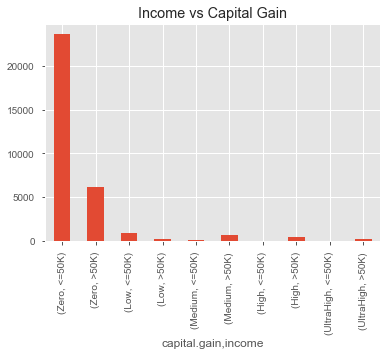

In [87]:
data.groupby(['capital.gain', 'income']).count()['age'].plot.bar(stacked=True)
plt.title('Income vs Capital Gain')

In [88]:
#doing onehot encoding
column_name='capital.gain'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 12. capital.loss

Seems data is too much skewed, from the stats shown in profiling 
<br>
Hence converting it in to categorical Zero, Low, Medium, High, UltraHigh

Text(0.5, 1, 'Income vs Capital Loss')

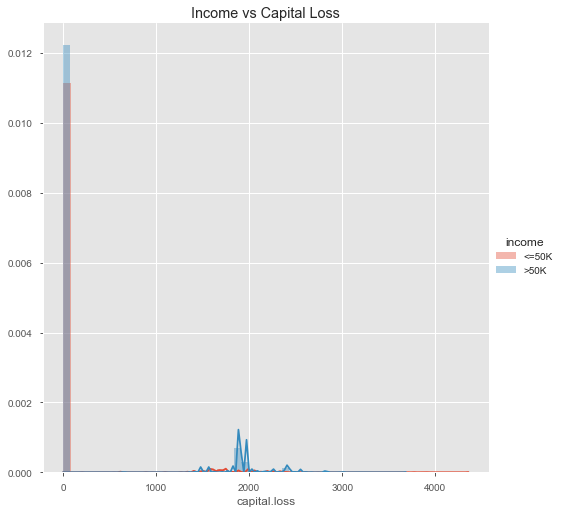

In [89]:
sns.FacetGrid(data,hue='income',size=7).map(sns.distplot,'capital.loss').add_legend()
plt.title('Income vs Capital Loss')

In [90]:
bins = [-1,0, 1000, 2000, 3000, 5000]
labels =['Zero','Low','Medium','High','UltraHigh']    # 
data['capital.loss']=pd.cut(data['capital.loss'], bins,labels=labels)

Text(0.5, 1.0, 'Income vs Capital Loss')

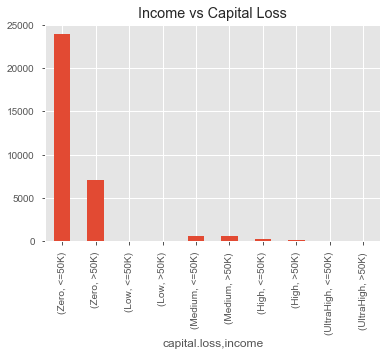

In [91]:
data.groupby(['capital.loss', 'income']).count()['age'].plot.bar(stacked=True)
plt.title('Income vs Capital Loss')

In [92]:
#doing onehot encoding
column_name='capital.loss'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 13. Hours.per.week

Text(0.5, 1, 'Income vs Hours Per Week')

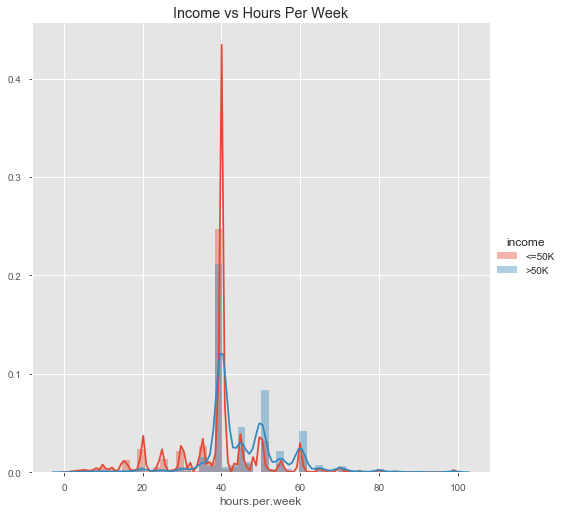

In [93]:
sns.FacetGrid(data,hue='income',size=7).map(sns.distplot,'hours.per.week').add_legend()
plt.title('Income vs Hours Per Week')

In [94]:
bins = [0,20, 35, 45, 60, 100]
labels =['Low','Medium','Normal','Overtime','owl']    # 
data['hours.per.week']=pd.cut(data['hours.per.week'], bins,labels=labels)

Text(0.5, 1.0, 'Income vs Hours Per Week')

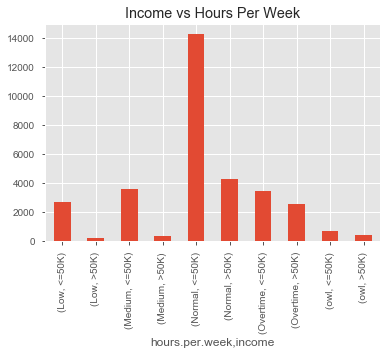

In [95]:
data.groupby(['hours.per.week', 'income']).count()['age'].plot.bar(stacked=True)
plt.title('Income vs Hours Per Week')

In [96]:
#doing onehot encoding
column_name='hours.per.week'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 14. native.country

There are 42 unique values, of which 40 countries does not have 1% representaion. 
<br>
So keeping this study as US and NON-US study, making this variable as binary


Text(0.5, 1.0, 'Income vs Native Country')

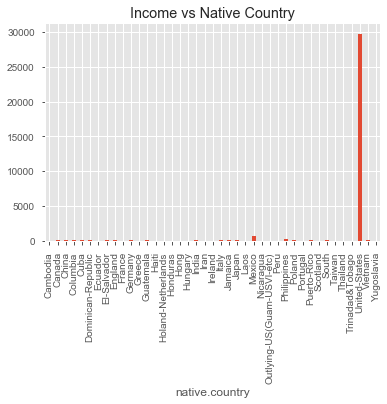

In [97]:
data.groupby(['native.country']).count()['age'].plot.bar(stacked=True)
plt.title('Income vs Native Country')

In [98]:
data['native.country'][data['native.country'] != 'United-States']=0
data['native.country'][data['native.country'] == 'United-States']=1 


Text(0.5, 1.0, 'Income vs Native Country')

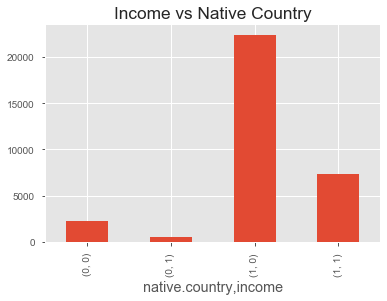

In [143]:
data.groupby(['native.country', 'income']).count()['age'].plot.bar(stacked=True)
plt.title('Income vs Native Country')

<a id="datapreparation"></a>

## Step 3: Feature Engineering

Move [top](#top)

**Replace income variable with 1 or 0**

In [100]:
data['income'] = data['income'].map({'>50K': 1, '<=50K': 0})

In [101]:
data['income'].unique()

array([0, 1], dtype=int64)

In [102]:
data.head()

,age,fnlwgt,sex,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,capital.loss_Zero,capital.loss_Low,capital.loss_Medium,capital.loss_High,capital.loss_UltraHigh,hours.per.week_Low,hours.per.week_Medium,hours.per.week_Normal,hours.per.week_Overtime,hours.per.week_owl
0,90,0.043987,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,82,0.081896,0,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,66,0.118021,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,54,0.086982,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,41,0.171404,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


### Extract X and Y colummns

In [103]:
label_col = data['income'] 
feature_col = data.drop(['income'],axis=1)

### Test Train Split - startified


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
#Constants
TEST_RATIO=0.33
RANDOM_STATE=101

In [106]:
x_train, x_test, y_train, y_test = train_test_split(feature_col, label_col,
                                                    test_size=TEST_RATIO,
                                                    random_state=RANDOM_STATE,
                                                    stratify=label_col)

<a id="buildingmodel"></a>
## Step 4: Building Model

Move [top](#top)

1. Gaussian Naive Bayes
2. Logistic Regression

In [107]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb=gnb.predict(x_test)

In [108]:

print("Accuracy: ", accuracy_score(y_test,y_pred_gnb))

Accuracy:  0.7897187558204507


### Multinomial NB

In [109]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred_mnb=mnb.predict(x_test)

In [110]:
print("Accuracy: ", accuracy_score(y_test,y_pred_mnb))

Accuracy:  0.821754516669771


In [111]:
# examine the class distribution of the testing set
y_test.value_counts()

0    8151
1    2587
Name: income, dtype: int64

**Logistic Regression Model**

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

log_model = LogisticRegression()

log_model.fit(x_train, y_train)

predictions = log_model.predict(x_test)


In [113]:
print("Accuracy score of logistic regression {0} \n\n{1}".format(accuracy_score(y_test, predictions), classification_report(y_test, predictions)))

Accuracy score of logistic regression 0.8536971503073199 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8151
           1       0.75      0.59      0.66      2587

    accuracy                           0.85     10738
   macro avg       0.81      0.76      0.78     10738
weighted avg       0.85      0.85      0.85     10738



<a id="evaluation"></a>
## Step 5: Evaluation of model
Move [top](#top)

### Confusion Matrix for Gaussian NB
- First argument is true values, second argument is predicted values this produces a 2x2 numpy array (matrix)

In [114]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_gnb))
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred_gnb).ravel()
(TN, FP, FN, TP)

[[6312 1839]
 [ 419 2168]]


(6312, 1839, 419, 2168)

- True Positives (TP)
- True Negatives (TN)
- False Positives (FP) (a Type I error)
- False Negatives (FN) (a Type II error)


In [115]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred_gnb[0:25])

True [0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0]
Pred [0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0]


 ##### Metrics computed from a confusion matrix
 ##### Classification Accuracy: Overall, how often is the classifier correct?

In [116]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_gnb))

0.7897187558204507
0.7897187558204507


##### Classification Error: Overall, how often is the classifier incorrect
##### Also known as "Misclassification Rate"

In [117]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_gnb))

0.21028124417954927
0.2102812441795493


### Sensitivity:
- When the actual value is positive, how often is the prediction correct

In [118]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_gnb))

0.8380363355237727
0.8380363355237727


### Specificity: 
- When the actual value is negative, how often is the prediction correct

In [119]:
specificity = TN / (TN + FP)
print(specificity)

0.7743835112256164


##### False Positive Rate: When the actual value is negative, how often is the prediction incorrect

In [120]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.2256164887743835
0.22561648877438356


##### Precision: When a positive value is predicted, how often is the prediction correct

In [121]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred_gnb))

0.5410531569752932
0.5410531569752932


### Receiver Operating Characteristic (ROC) Curves for Gaussian NB
- ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for particular context

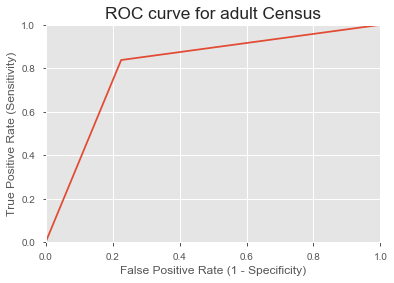

In [122]:
# First argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_gnb)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for adult Census')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [123]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [124]:
evaluate_threshold(0.5)

Sensitivity: 0.8380363355237727
Specificity: 0.7743835112256165


In [125]:
evaluate_threshold(0.3)

Sensitivity: 0.8380363355237727
Specificity: 0.7743835112256165


### AUC for Gaussian NB

- AUC is the percentage of the ROC plot that is underneath the curve
- AUC is useful as a single number summary of classifier performance
- Higher value = better classifier
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation
- AUC is useful even when there is high class imbalance (unlike classification accuracy)
- Fraud case
- Null accuracy almost 99%


In [126]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_gnb))

0.8062099233746945


In [127]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()
cross_val_score(logreg, feature_col, label_col, cv=10, scoring='roc_auc').mean()

0.8416970278589023

### Confusion Matrix for Multinomial NB
- First argument is true values, second argument is predicted values this produces a 2x2 numpy array (matrix)


In [128]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_mnb))
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred_mnb).ravel()
(TN, FP, FN, TP)

[[6897 1254]
 [ 660 1927]]


(6897, 1254, 660, 1927)

- True Positives (TP)
- True Negatives (TN)
- False Positives (FP) (a Type I error)
- False Negatives (FN) (a Type II error)

In [129]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred_mnb[0:25])

True [0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0]
Pred [0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0]


##### Metrics computed from a confusion matrix
##### Classification Accuracy: Overall, how often is the classifier correct?

In [130]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_mnb))

0.821754516669771
0.821754516669771


Classification Error: Overall, how often is the classifier incorrect
Also known as "Misclassification Rate"

In [131]:

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_mnb))

0.1782454833302291
0.17824548333022905


### Sensitivity:
When the actual value is positive, how often is the prediction correct

In [132]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_mnb))

0.7448782373405489
0.7448782373405489


### Specificity: 
- When the actual value is negative, how often is the prediction correct

In [133]:
specificity = TN / (TN + FP)
print(specificity)

0.8461538461538461


False Positive Rate: When the actual value is negative, how often is the prediction incorrect
false_positive_rate = FP / float(TN + FP)

In [134]:
print(false_positive_rate)
print(1 - specificity)

0.2256164887743835
0.15384615384615385


### Precision: 
- When a positive value is predicted, how often is the prediction correct

In [135]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred_mnb))

0.6057843445457404
0.6057843445457404


### Receiver Operating Characteristic (ROC) Curves for Multinomial NB

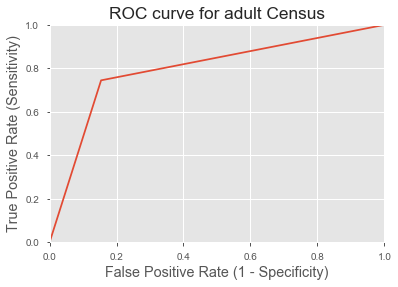

In [136]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_mnb)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for adult Census')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

### Define a function that accepts a threshold and prints sensitivity and specificity

In [137]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [138]:
evaluate_threshold(0.5)

Sensitivity: 0.7448782373405489
Specificity: 0.8461538461538461


In [139]:
evaluate_threshold(0.3)

Sensitivity: 0.7448782373405489
Specificity: 0.8461538461538461


<a id="decisionboundary"></a>

## Step 6: Decision Boundary

Move [top](#top)


**Decision boundary** is employed in statistical classificaiton with two class problem. The `decision boundary or decision surface` is a hyperplane that partition underlying vector space into two set, one for each class.

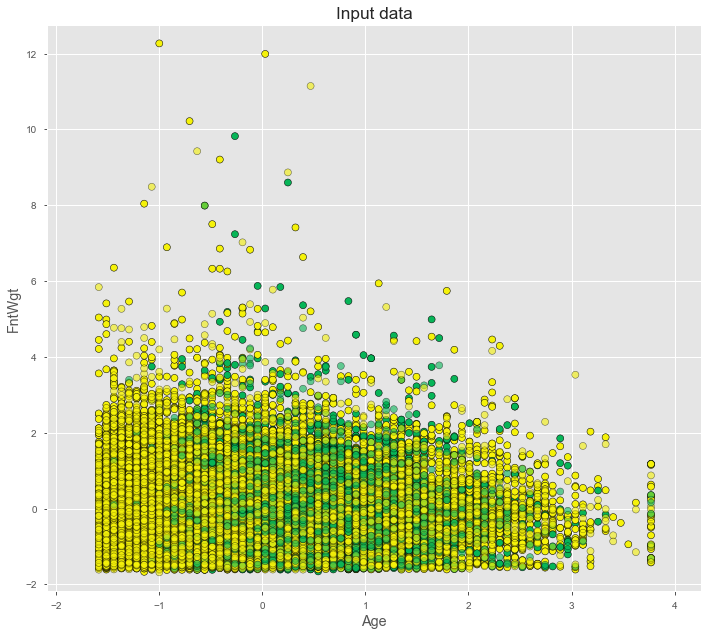

In [140]:
# Classifiers names
names = ['Decision Tree', 'LDA', 'Logistic Regression', 'Naive Bayes']
# Classifier algorithms
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    GaussianNB()   
]

y = data['income']
X = data.drop('income', axis=1)

# Prepare dataset
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plotting the dataset
cm = plt.cm.BuPu
cm_bright = ListedColormap(['#f5f20a', '#07b558'])

h_step = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h_step),
                     np.arange(y_min, y_max, h_step))

fig, ax = plt.subplots(figsize=(10,9))
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Age")
ax.set_ylabel("FntWgt")
plt.tight_layout()
plt.show()

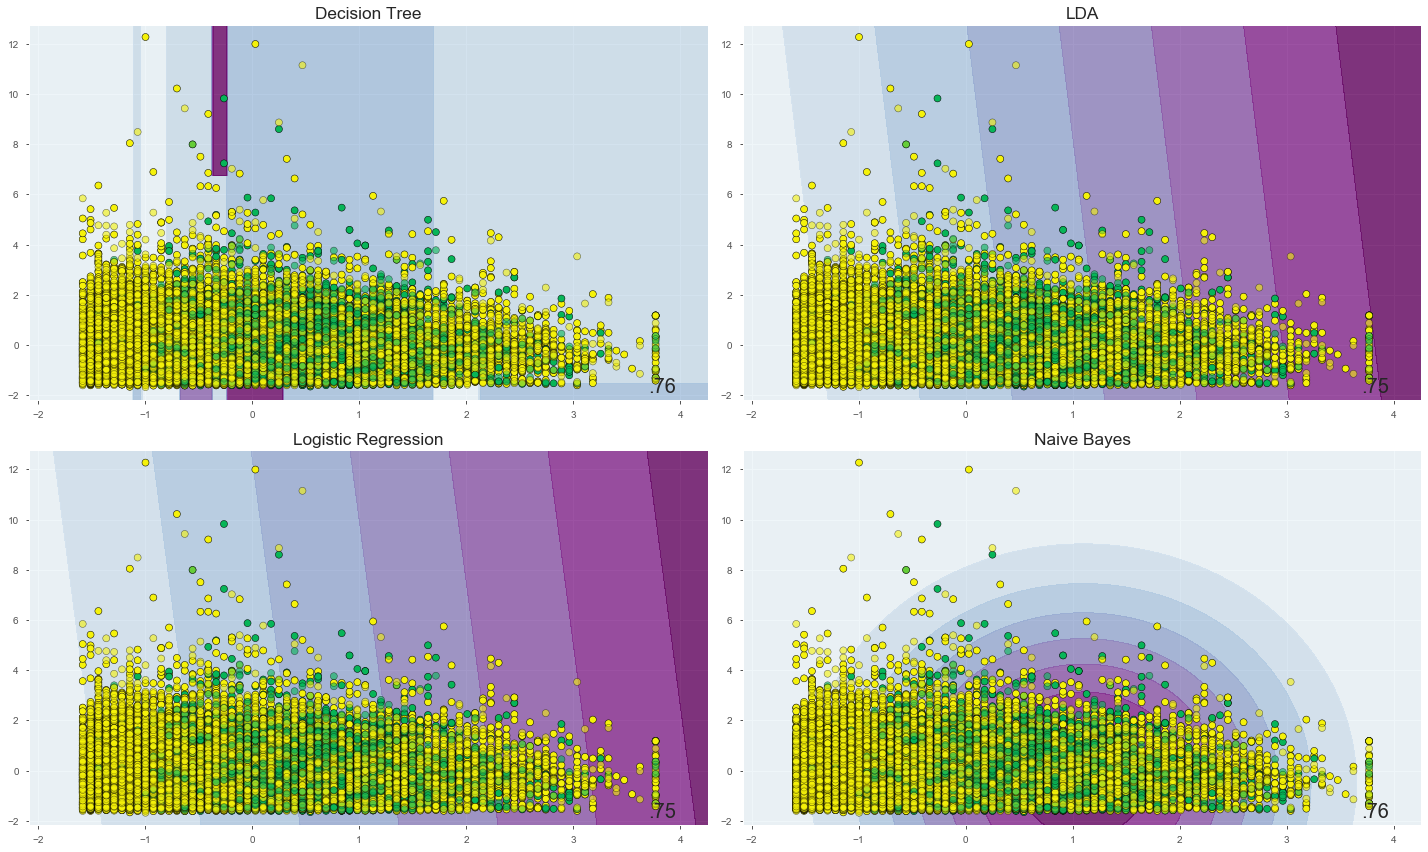

In [141]:
i = 1
fig = plt.figure(figsize=(20,12))

 # iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(2, 2, i)
    clf.fit(X_train[:, 0:2], y_train)
    score = clf.score(X_test[:, 0:2], y_test)

    if hasattr(clf, "decision_function"):
        Z_val = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z_val = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z_val = Z_val.reshape(xx.shape)
    ax.contourf(xx, yy, Z_val, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=20, horizontalalignment='right')
    i += 1
    
plt.tight_layout()
plt.show()